In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
ARC = pd.read_csv('./Car details v3.csv')
print(ARC.shape)
ARC.head(8)

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


In [5]:
ARC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
ARC.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
ARC.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
print("Cantidad de valores faltantes para mileage ",ARC['mileage'].isnull().sum())
print("Cantidad de valores faltantes para engine ",ARC['engine'].isnull().sum())
print("Cantidad de valores faltantes para max_power ",ARC['max_power'].isnull().sum())
print("Cantidad de valores faltantes para torque ",ARC['torque'].isnull().sum())
print("Cantidad de valores faltantes para seats ",ARC['seats'].isnull().sum())

Cantidad de valores faltantes para mileage  221
Cantidad de valores faltantes para engine  221
Cantidad de valores faltantes para max_power  215
Cantidad de valores faltantes para torque  222
Cantidad de valores faltantes para seats  221


In [11]:
ARC.dropna(subset=['mileage', 'engine', 'max_power', 'torque', 'seats'],inplace=True)

In [12]:
ARC.shape

(7906, 13)

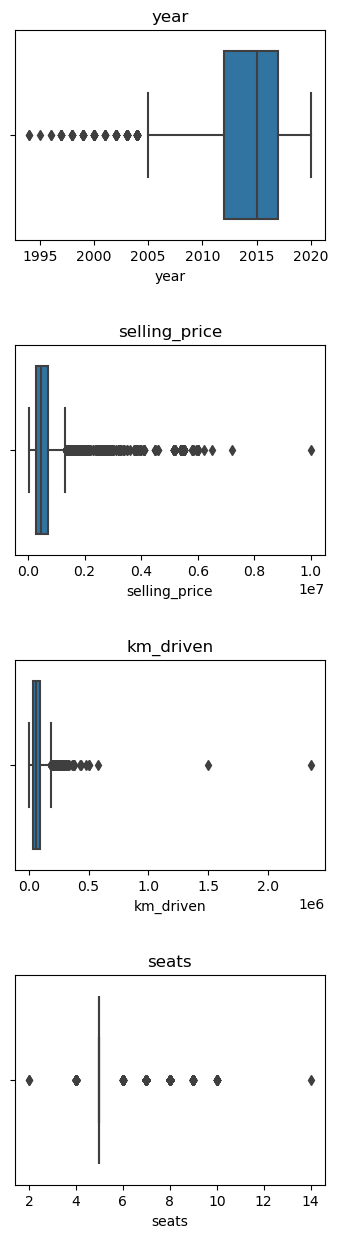

In [17]:
columns_num = ['year','selling_price','km_driven','seats']

fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(4,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_num):
    sns.boxplot(x=col, data=ARC, ax=ax[i])
    ax[i].set_title(col)

In [18]:
ARC.drop(ARC[ARC['km_driven']>250000].index,inplace=True)

In [19]:
ARC.shape

(7861, 13)

In [21]:
#Eliminación de subcategoría que no es relevante
ARC.drop(ARC[ARC['owner']=='Test Drive Car'].index,inplace=True)

ARC.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
ARC.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
ARC.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
ARC.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}},inplace=True)

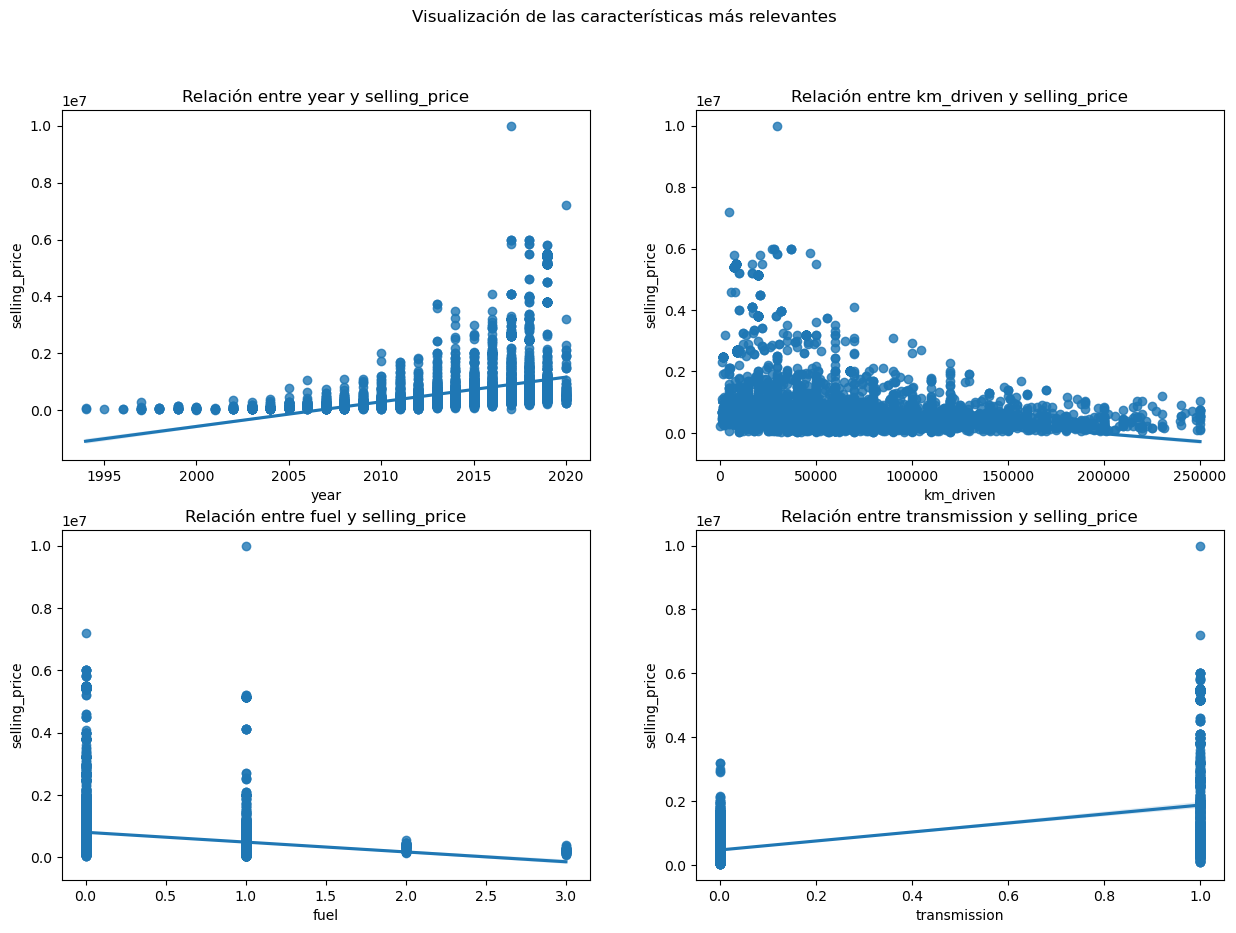

In [40]:
#Seleccionar las características más relevantes para entrenar al modelo
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las características más relevantes
selected_features = ['year', 'km_driven', 'fuel', 'transmission']

# Crear la figura con subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Visualización de las características más relevantes')

# Iterar sobre las características seleccionadas y crear los gráficos
for i, feature in enumerate(selected_features):
    sns.regplot(x=feature, y='selling_price', data=ARC, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Relación entre {feature} y selling_price')

plt.show()

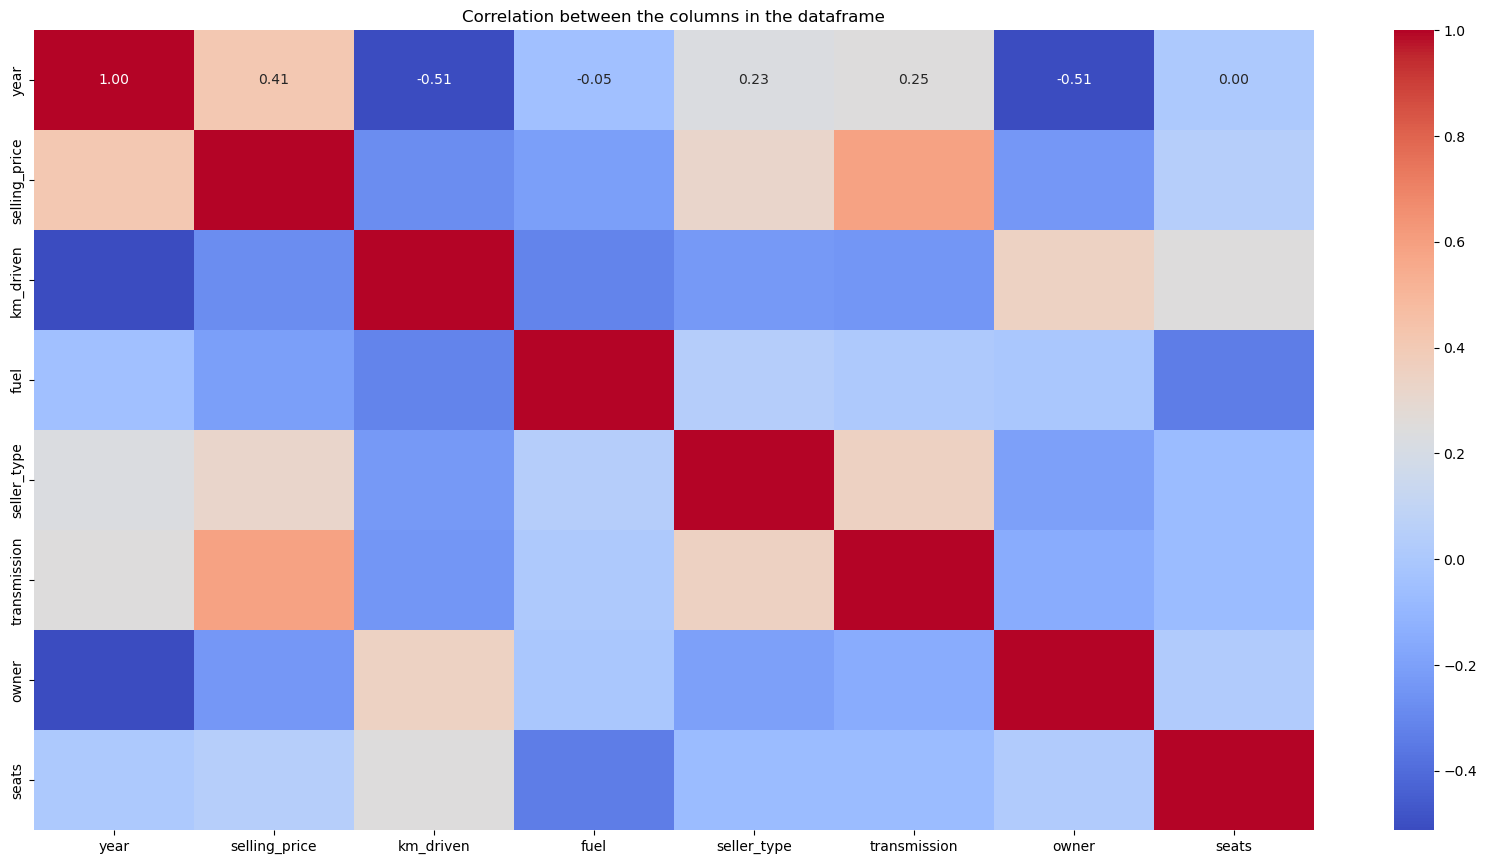

In [46]:

plt.figure(figsize=(20, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
sns.heatmap(ARC.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between the columns in the dataframe')
plt.show()


In [47]:
ARC.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
0,2014,450000,145500,0,0,0,0,5.0
1,2014,370000,120000,0,0,0,1,5.0
2,2006,158000,140000,1,0,0,2,5.0
3,2010,225000,127000,0,0,0,0,5.0
4,2007,130000,120000,1,0,0,0,5.0


In [50]:
#4. Dividir el dataset en test y train para evaluar correctamente el modelo
X = ARC.drop('selling_price',axis=1) 
Y = ARC['selling_price'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=2)

print(Y_test)

6449    150000
92      351000
955     800000
2416    950000
1223    395000
         ...  
2287    320000
7623    260000
3116    975000
6127    385000
7820    900000
Name: selling_price, Length: 1964, dtype: int64


In [51]:
#5. Entrenar el modelo configurando los hiperparámetros
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
LinearRegression()

LinearRegression()

In [52]:
predictions = lin_reg_model.predict(X_train)
print(predictions.__len__())

5892


In [53]:
#6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc
error_score = metrics.r2_score(Y_train, predictions)
mse = metrics.mean_squared_error(Y_train, predictions)
mae = metrics.mean_absolute_error(Y_train, predictions)

print("R squared Error : ", error_score)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R squared Error :  0.4795806275378216
Mean Squared Error (MSE): 346809814187.7228
Mean Absolute Error (MAE): 313522.93702288746


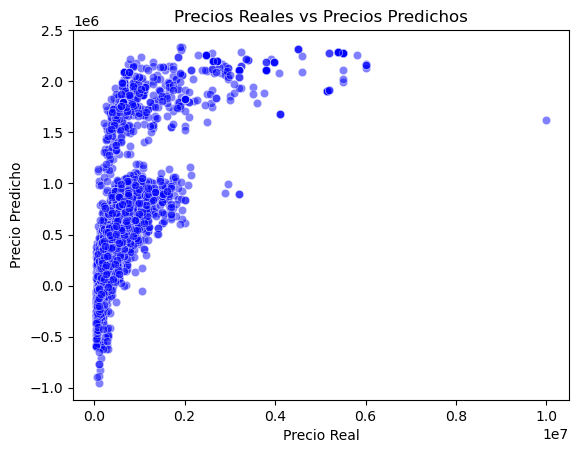

In [54]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
# Crear un gráfico de dispersión utilizando seaborn
sns.scatterplot(x=Y_train, y=predictions, color='blue', alpha=0.5)
# Añadir etiquetas y título
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precios Reales vs Precios Predichos")
plt.show()